In [2]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
df = pd.read_csv("df_cleaned_strength.csv")

In [4]:
df.shape

(700, 35)

In [6]:
df.head()

,Unnamed: 0,Idx_Sample,Ref.,Mixture Code in Ref,FA (kg/m3),GGBFS (kg/m3),Total Na2SiO3 (kg in 1m3 of mix),Total NaOH (kg in 1m3 mix),NaOH\nConcentration (M),Superplasticizer (kg in 1m3 mix),7-d Cubic compressive strength (MPa),28-d Cubic compressive strength (MPa),90-d Cubic compressive strength (MPa),365-d Cubic compressive strength (MPa),7-d Cylindrical compressive strength (MPa),28-d Cylindrical compressive strength (MPa),56-d Cylindrical compressive strength (MPa),90-d Cylindrical compressive strength (MPa),180-d Ec (MPa),28-d WA (%),28-d Porosity/AVPV (%),28-d Water permeability (mm),28-d Abrasion resistance (mm),28-d UPV (m/s),28-d sorptivity(m/s^0.5),Slump (mm),flowtable,Seeting I,Setting F,CO2 Footprint\n(kg/m³),% FA in Mix,% GGBFS in Mix,Na2SiO3\nConcentration (M),NaOH / Na2SiO3\nVolume Ratio,NaOH / Na2SiO3\nMass Ratio
0,0,129,[3],Batch,465.0,NaN,38.3625,217.3875,12.5,0.0,NaN,43.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.830365,19.214876,0.0,0.0,0.0,5.666667
1,1,147,[7],NaN,400.0,NaN,171.4200,68.5700,10.0,6.0,25.22,27.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,NaN,NaN,NaN,158.022153,16.666667,0.0,0.0,0.0,0.400012
2,2,148,[7],NaN,400.0,NaN,171.4200,68.5700,12.0,6.0,27.38,29.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,168.527077,16.666667,0.0,0.0,0.0,0.400012
3,3,149,[7],NaN,400.0,NaN,171.4200,68.5700,14.0,6.0,28.18,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,NaN,NaN,NaN,179.032001,16.666667,0.0,0.0,0.0,0.400012
4,4,150,[7],NaN,400.0,NaN,171.4200,68.5700,16.0,6.0,29.80,32.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,189.536925,16.666667,0.0,0.0,0.0,0.400012


In [8]:
df.columns

Index(['Unnamed: 0', 'Idx_Sample', 'Ref.', 'Mixture Code in Ref', 'FA (kg/m3)',
       'GGBFS (kg/m3)', 'Total Na2SiO3 (kg in 1m3 of mix)',
       'Total NaOH (kg in 1m3 mix)', 'NaOH\nConcentration (M)',
       'Superplasticizer (kg in 1m3 mix)',
       '7-d Cubic compressive strength (MPa)',
       '28-d Cubic compressive strength (MPa)',
       '90-d Cubic compressive strength (MPa) ',
       '365-d Cubic compressive strength (MPa) ',
       '7-d Cylindrical compressive strength (MPa)',
       '28-d Cylindrical compressive strength (MPa)',
       '56-d Cylindrical compressive strength (MPa) ',
       '90-d Cylindrical compressive strength (MPa)', '180-d Ec (MPa) ',
       '28-d WA (%)', '28-d Porosity/AVPV (%)', '28-d Water permeability (mm)',
       '28-d Abrasion resistance (mm)', '28-d UPV (m/s)',
       '28-d sorptivity(m/s^0.5)', 'Slump (mm)', 'flowtable', 'Seeting I',
       'Setting F', 'CO2 Footprint\n(kg/m³)', '% FA in Mix', '% GGBFS in Mix',
       'Na2SiO3\nConcentration (

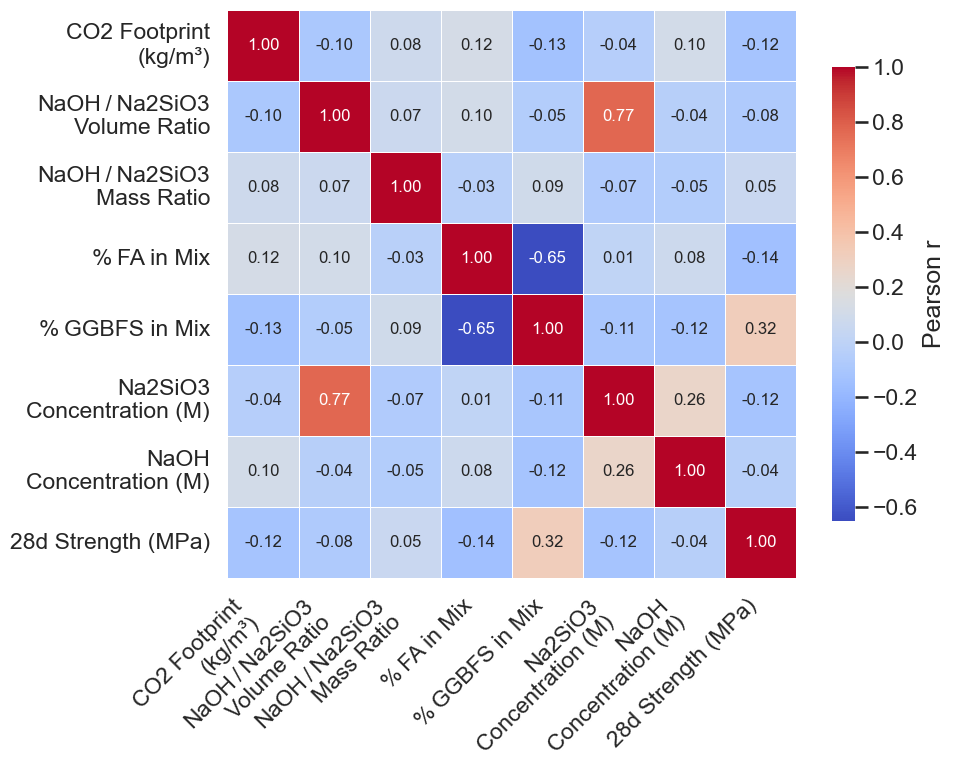

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 0) Rename the long column to a shorter name
df = df.rename(columns={
    "28-d Cubic compressive strength (MPa)": "28d Strength (MPa)"
})

# 1) List of columns to include (now with the shorter strength name)
columns = [
    "CO2 Footprint\n(kg/m³)",
    "NaOH / Na2SiO3\nVolume Ratio",
    "NaOH / Na2SiO3\nMass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)",
    "NaOH\nConcentration (M)",
    "28d Strength (MPa)"              # newly added
]

# 2) Compute Pearson correlation matrix on those columns
corr = df[columns].corr(method="pearson")

# 3) Plot heatmap
plt.figure(figsize=(10, 8))
sns.set_theme(style="white", context="talk")

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": .8, "label": "Pearson r"},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 12}
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# 4) Save at high resolution
plt.savefig("Geopolymer_correlation_heatmap_with_strength.png", dpi=500, bbox_inches="tight")
plt.show()


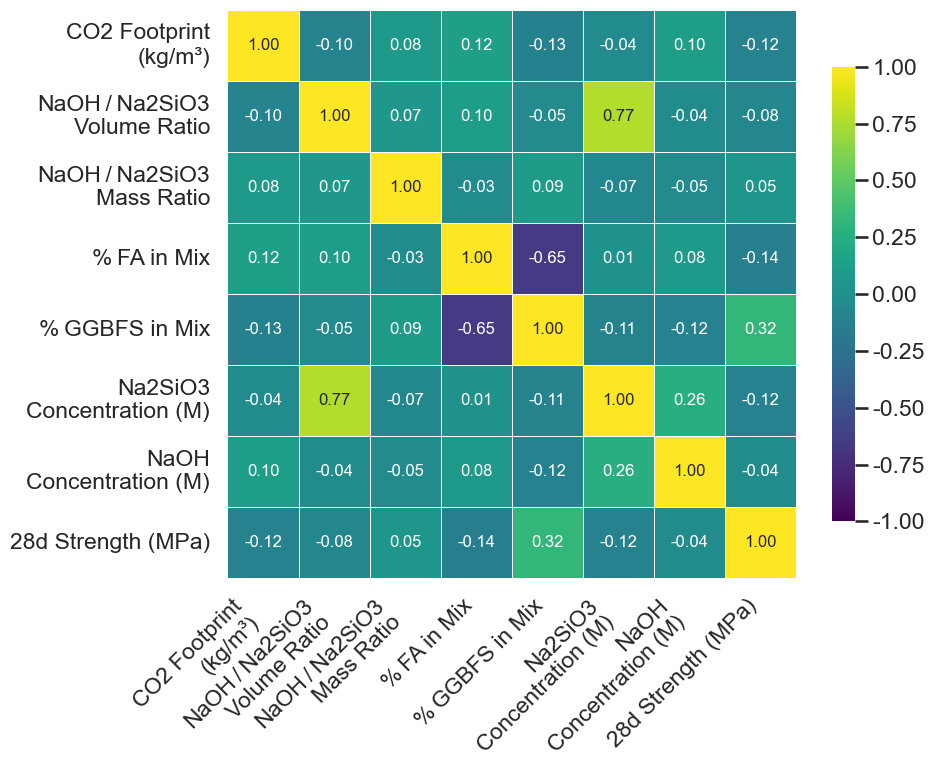

In [12]:
# compute Pearson correlation matrix
corr = df[columns].corr(method="pearson")

# set up the figure
plt.figure(figsize=(10, 8))
sns.set_theme(style="white", context="talk")

ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",      # viridis gives the purple→yellow ramp
    vmin=-1, vmax=1,     # fixes the color‐range from -1 to +1
    linewidths=0.5,
    square=True,
    annot_kws={"size": 12},
    cbar_kws={
        "shrink": 0.8,
        "ticks": np.linspace(-1, 1, 9),  # -1.00, -0.75, …, 1.00
        "format": "%.2f"                  # two-decimal formatting
    }
)

# rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.savefig("Geopolymer_correlation_heatmap_full.png", dpi=500, bbox_inches="tight")
plt.show()


Algorithm: Random Forest Regressors + Simulated Annealing Optimization
(strength ≥ 60 MPa, minimize CO2 Footprint)

Training CO2 model...
Training strength model...
Models trained.

CO2 Footprint validation:
 • R²   = 0.8832
 • MSE  = 708.8490
 • RMSE = 26.6242
 • MAE  = 16.1849

28d Strength validation:
 • R²   = 0.6317
 • MSE  = 85.0091
 • RMSE = 9.2200
 • MAE  = 6.7665

Running Simulated Annealing optimization...
Optimization complete.

Optimal mix ratios found:
 • NaOH/Na2SiO3 Mass Ratio        = 4.2065
 • % FA in Mix                    = 2.4126
 • % GGBFS in Mix                 = 7.0434
 • Na2SiO3 Concentration (M)      = 2.7351
 • NaOH Concentration (M)         = 6.8058

Predicted CO2 Footprint: 83.2092 kg/m3
Predicted 28d Strength:  60.1167 MPa



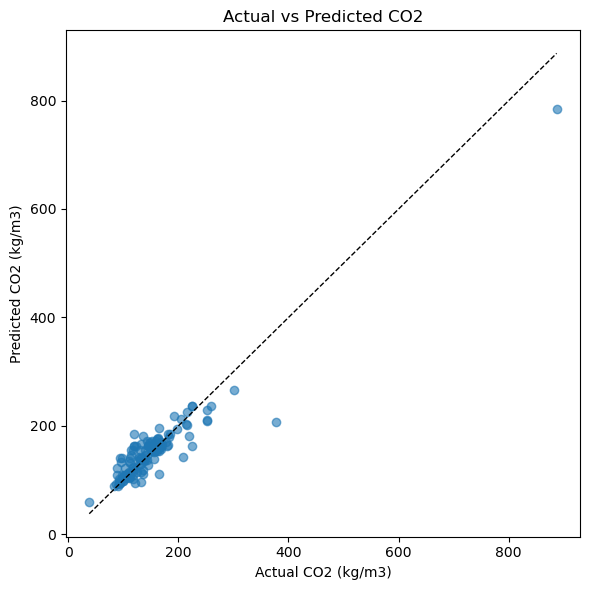

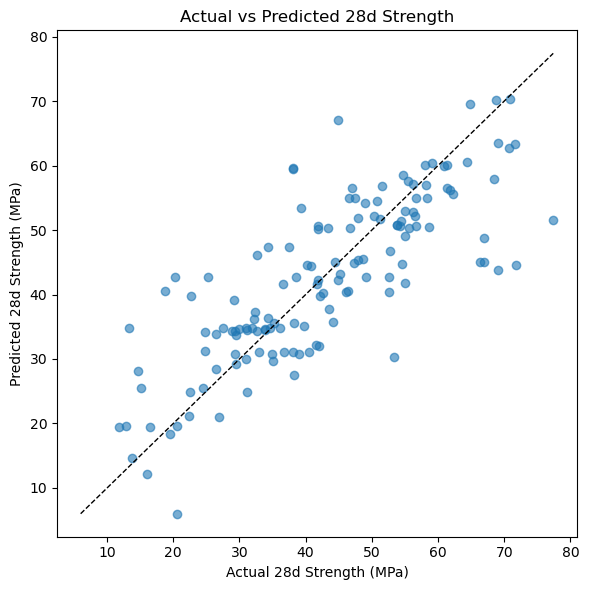

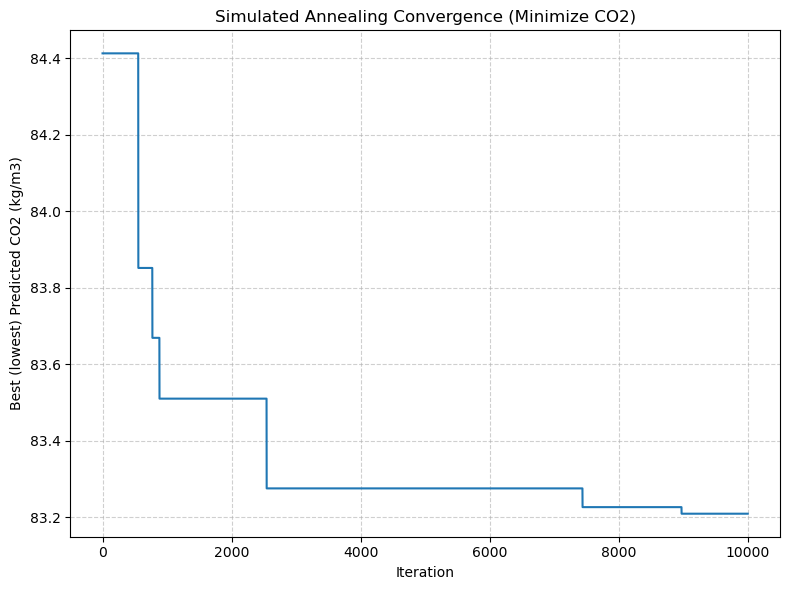

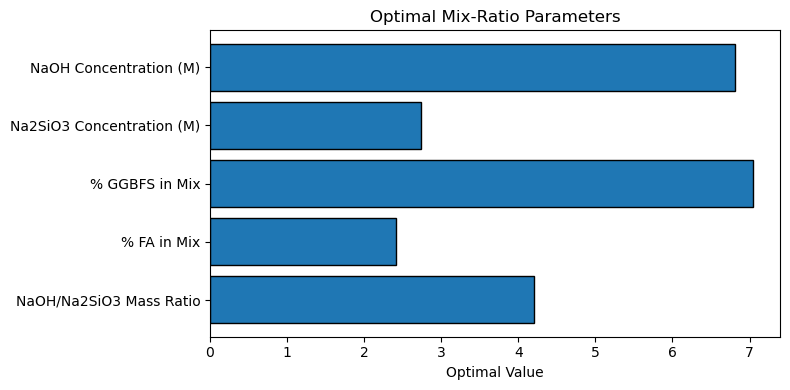

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 0) Rename columns to plain ASCII
df = df.rename(columns={
    "CO2 Footprint\n(kg/m³)":              "CO2 Footprint (kg/m3)",
    "28-d Cubic compressive strength (MPa)": "28d Strength (MPa)",
    "NaOH / Na2SiO3\nMass Ratio":          "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix":                         "% FA in Mix",
    "% GGBFS in Mix":                      "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)":          "Na2SiO3 Concentration (M)",
    "NaOH\nConcentration (M)":             "NaOH Concentration (M)"
})

# 1) Specify mix‐ratio features and targets
features = [
    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3 Concentration (M)",
    "NaOH Concentration (M)"
]
target_co2 = "CO2 Footprint (kg/m3)"
target_str = "28d Strength (MPa)"

# 2) Split data into training and validation sets
X = df[features].values
y_co2 = df[target_co2].values
y_str = df[target_str].values

X_train, X_val, y_co2_train, y_co2_val, y_str_train, y_str_val = train_test_split(
    X, y_co2, y_str, test_size=0.20, random_state=42
)

# 3) Print algorithm info
print("Algorithm: Random Forest Regressors + Simulated Annealing Optimization\n"
      "(strength ≥ 60 MPa, minimize CO2 Footprint)\n")

# 4) Train two separate Random Forest models
print("Training CO2 model...")
model_co2 = RandomForestRegressor(n_estimators=200, random_state=42)
model_co2.fit(X_train, y_co2_train)
print("Training strength model...")
model_str = RandomForestRegressor(n_estimators=200, random_state=42)
model_str.fit(X_train, y_str_train)
print("Models trained.\n")

# 5) Validation metrics
y_co2_pred = model_co2.predict(X_val)
y_str_pred = model_str.predict(X_val)

def print_metrics(name, y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{name} validation:")
    print(f" • R²   = {r2:.4f}")
    print(f" • MSE  = {mse:.4f}")
    print(f" • RMSE = {rmse:.4f}")
    print(f" • MAE  = {mae:.4f}\n")

print_metrics("CO2 Footprint", y_co2_val, y_co2_pred)
print_metrics("28d Strength", y_str_val, y_str_pred)

# 6) Simulated Annealing to minimize CO2 under strength ≥ 60 MPa
train_df = pd.DataFrame(X_train, columns=features)
train_df["CO2"] = y_co2_train
train_df["Strength"] = y_str_train

# initialize from the training row with lowest CO2 among those with strength ≥ 60
feasible = train_df[train_df["Strength"] >= 60]
if not feasible.empty:
    idx0 = feasible["CO2"].idxmin()
else:
    idx0 = train_df["Strength"].idxmax()

current      = train_df.loc[idx0, features].values.copy()
current_co2  = model_co2.predict(current.reshape(1, -1))[0]
current_str  = model_str.predict(current.reshape(1, -1))[0]
best         = current.copy()
best_co2     = current_co2
best_co2_list = [best_co2]

# precompute bounds and step sizes
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)
sigma = (maxs - mins) * 0.1  # 10% of each feature’s range

T = 10.0
alpha = 0.99
max_iter = 10000

print("Running Simulated Annealing optimization...")
for i in range(max_iter):
    # propose new candidate
    cand = current + np.random.normal(0, sigma)
    cand = np.minimum(np.maximum(cand, mins), maxs)

    pred_str = model_str.predict(cand.reshape(1, -1))[0]
    if pred_str >= 60:
        pred_co2 = model_co2.predict(cand.reshape(1, -1))[0]
        # Metropolis criterion for minimization
        if (pred_co2 < current_co2 or
            np.random.rand() < np.exp((current_co2 - pred_co2) / T)):
            current, current_co2 = cand, pred_co2
            if pred_co2 < best_co2:
                best, best_co2 = cand.copy(), pred_co2

    best_co2_list.append(best_co2)
    T *= alpha
print("Optimization complete.\n")

# 7) Output optimal mix and predictions
best_str = model_str.predict(best.reshape(1, -1))[0]
print("Optimal mix ratios found:")
for feat, val in zip(features, best):
    print(f" • {feat:<30} = {val:.4f}")
print(f"\nPredicted CO2 Footprint: {best_co2:.4f} kg/m3")
print(f"Predicted 28d Strength:  {best_str:.4f} MPa\n")

# 8) Publication-ready plots (500 dpi)

# 8a) Actual vs Predicted CO2
plt.figure(figsize=(6,6))
plt.scatter(y_co2_val, y_co2_pred, alpha=0.6)
lims = [min(y_co2_val.min(), y_co2_pred.min()), max(y_co2_val.max(), y_co2_pred.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("Actual CO2 (kg/m3)")
plt.ylabel("Predicted CO2 (kg/m3)")
plt.title("Actual vs Predicted CO2")
plt.tight_layout()
plt.savefig("actual_vs_predicted_CO2_min.png", dpi=500, bbox_inches="tight")

# 8b) Actual vs Predicted Strength
plt.figure(figsize=(6,6))
plt.scatter(y_str_val, y_str_pred, alpha=0.6)
lims = [min(y_str_val.min(), y_str_pred.min()), max(y_str_val.max(), y_str_pred.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("Actual 28d Strength (MPa)")
plt.ylabel("Predicted 28d Strength (MPa)")
plt.title("Actual vs Predicted 28d Strength")
plt.tight_layout()
plt.savefig("actual_vs_predicted_strength_min.png", dpi=500, bbox_inches="tight")

# 8c) Convergence of CO2 during SA
plt.figure(figsize=(8,6))
plt.plot(best_co2_list, linewidth=1.5)
plt.xlabel("Iteration")
plt.ylabel("Best (lowest) Predicted CO2 (kg/m3)")
plt.title("Simulated Annealing Convergence (Minimize CO2)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("sa_convergence_CO2_min.png", dpi=500, bbox_inches="tight")

# 8d) Optimal mix‐ratio bar chart
plt.figure(figsize=(8,4))
plt.barh(features, best, edgecolor='black')
plt.xlabel("Optimal Value")
plt.title("Optimal Mix‐Ratio Parameters")
plt.tight_layout()
plt.savefig("optimal_mix_parameters_min.png", dpi=500, bbox_inches="tight")

plt.show()


In [22]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 4.9 MB/s eta 0:00:0000:0100:01


In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

# 1) Prepare your DataFrame 'df' with features X and target y
features = [
    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3 Concentration (M)",
    "NaOH Concentration (M)"
]
target = "CO2 Footprint (kg/m3)"

X = df[features].values
y = df[target].values

# 2) Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Evaluating multiple regression models on CO2 Footprint prediction\n")

# 3) Define models
models = {
    "LinearRegression":    LinearRegression(),
    "Ridge":               Ridge(random_state=42),
    "Lasso":               Lasso(random_state=42),
    "DecisionTree":        DecisionTreeRegressor(random_state=42),
    "RandomForest":        RandomForestRegressor(random_state=42),
    "ExtraTrees":          ExtraTreesRegressor(random_state=42),
    "GradientBoosting":    GradientBoostingRegressor(random_state=42),
    "XGBRegressor":        XGBRegressor(random_state=42, verbosity=0),
    "LGBMRegressor":       LGBMRegressor(random_state=42),
    "SVR":                 SVR(),
    "KNN":                 KNeighborsRegressor(),
    "CatBoost":            CatBoostRegressor(random_state=42, verbose=0)
}

# 4) Train, predict, and collect metrics
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse   = mean_squared_error(y_val, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_val, y_pred)
    r2    = r2_score(y_val, y_pred)
    results.append({
        "Model": name,
        "R2":    r2,
        "MSE":   mse,
        "RMSE":  rmse,
        "MAE":   mae
    })

# 5) Display results as a DataFrame
metrics_df = pd.DataFrame(results).set_index("Model")
print(metrics_df.sort_values("R2", ascending=False))


Evaluating multiple regression models on CO2 Footprint prediction

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 5
[LightGBM] [Info] Start training from score 153.594153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [26]:
import pandas as pd

# assume `results` is your list of dicts:
# [
#   {"Model": "LinearRegression", "R2": 0.85, "MSE": 12.34, "RMSE": 3.51, "MAE": 2.45},
#   ...
# ]

# 1) Create DataFrame and set index
df_metrics = pd.DataFrame(results).set_index("Model")

# 2) Round metrics to 4 decimal places
df_metrics = df_metrics.round({
    "R2":   4,
    "MSE":  4,
    "RMSE": 4,
    "MAE":  4
})

# 3) Style the table:
#    - Gradient on R2 (higher=greener)
#    - Bar charts for MSE, RMSE, MAE
styled = (
    df_metrics.style
        .background_gradient(subset=["R2"], cmap="Greens")
        .bar(subset=["MSE", "RMSE", "MAE"], color="#66c2a5")
        .set_caption("Model Performance on CO2 Footprint Prediction")
)

# 4) Display (in Jupyter) or render to HTML
styled


,R2,MSE,RMSE,MAE
Model,,,,
LinearRegression,0.024900,5916.178600,76.916700,40.932600
Ridge,0.025100,5915.342200,76.911300,40.927100
Lasso,0.028600,5893.851800,76.771400,40.765500
DecisionTree,0.835300,999.223000,31.610500,17.054200
RandomForest,0.888500,676.797700,26.015300,15.915300
ExtraTrees,0.888700,675.570400,25.991700,14.440700
GradientBoosting,0.866700,808.789900,28.439200,18.117700
XGBRegressor,0.882100,715.665700,26.751900,16.141800
LGBMRegressor,0.858800,856.532700,29.266600,19.448200


In [28]:
import pandas as pd

# assume `results` is your list of dicts from model evaluation
df_metrics = pd.DataFrame(results).set_index("Model").round({
    "R2":   4,
    "MSE":  4,
    "RMSE": 4,
    "MAE":  4
})

# style the table
styled = (
    df_metrics.style
        .background_gradient(subset=["R2"], cmap="Greens")
        .bar(subset=["MSE", "RMSE", "MAE"], color="#66c2a5")
        .set_caption("Model Performance on CO2 Footprint Prediction")
)

# display in notebook
display(styled)

# save the styled table as HTML
styled.to_html("model_performance.html")

# save the styled table to Excel (requires openpyxl)
styled.to_excel("model_performance.xlsx", engine="openpyxl")


,R2,MSE,RMSE,MAE
Model,,,,
LinearRegression,0.024900,5916.178600,76.916700,40.932600
Ridge,0.025100,5915.342200,76.911300,40.927100
Lasso,0.028600,5893.851800,76.771400,40.765500
DecisionTree,0.835300,999.223000,31.610500,17.054200
RandomForest,0.888500,676.797700,26.015300,15.915300
ExtraTrees,0.888700,675.570400,25.991700,14.440700
GradientBoosting,0.866700,808.789900,28.439200,18.117700
XGBRegressor,0.882100,715.665700,26.751900,16.141800
LGBMRegressor,0.858800,856.532700,29.266600,19.448200


In [35]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

# 0) Rename strength column to remove subscripts/superscripts
df = df.rename(columns={
    "28-d Cubic compressive strength (MPa)": "28d Strength (MPa)"
})

# 1) Define features and targets
features = [
    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3 Concentration (M)",
    "NaOH Concentration (M)"
]
target_co2 = "CO2 Footprint (kg/m3)"
target_str = "28d Strength (MPa)"

X = df[features].values
y_co2 = df[target_co2].values
y_str = df[target_str].values

# 2) Split into train/validation (20% hold-out)
X_train, X_val, y_co2_train, y_co2_val, y_str_train, y_str_val = train_test_split(
    X, y_co2, y_str, test_size=0.20, random_state=42
)

print("Evaluating multiple regression models on CO2 and 28d Strength prediction\n")

# 3) Model constructors
model_constructors = {
    "LinearRegression": lambda: LinearRegression(),
    "Ridge":            lambda: Ridge(random_state=42),
    "Lasso":            lambda: Lasso(random_state=42),
    "DecisionTree":     lambda: DecisionTreeRegressor(random_state=42),
    "RandomForest":     lambda: RandomForestRegressor(random_state=42),
    "ExtraTrees":       lambda: ExtraTreesRegressor(random_state=42),
    "GradientBoosting": lambda: GradientBoostingRegressor(random_state=42),
    "XGBRegressor":     lambda: XGBRegressor(random_state=42, verbosity=0),
    "LGBMRegressor":    lambda: LGBMRegressor(random_state=42),
    "SVR":              lambda: SVR(),
    "KNN":              lambda: KNeighborsRegressor(),
    "CatBoost":         lambda: CatBoostRegressor(random_state=42, verbose=0)
}

# 4) Train, predict, and collect metrics for both targets
results_co2 = []
results_str = []

for name, make_model in model_constructors.items():
    # CO2 model
    m_co2 = make_model()
    m_co2.fit(X_train, y_co2_train)
    y_co2_pred = m_co2.predict(X_val)
    mse2   = mean_squared_error(y_co2_val, y_co2_pred)
    rmse2  = np.sqrt(mse2)
    mae2   = mean_absolute_error(y_co2_val, y_co2_pred)
    r2_2   = r2_score(y_co2_val, y_co2_pred)
    results_co2.append({
        "Model": name,
        "R2":    r2_2,
        "MSE":   mse2,
        "RMSE":  rmse2,
        "MAE":   mae2
    })

    # Strength model
    m_str = make_model()
    m_str.fit(X_train, y_str_train)
    y_str_pred = m_str.predict(X_val)
    mse_s   = mean_squared_error(y_str_val, y_str_pred)
    rmse_s  = np.sqrt(mse_s)
    mae_s   = mean_absolute_error(y_str_val, y_str_pred)
    r2_s    = r2_score(y_str_val, y_str_pred)
    results_str.append({
        "Model": name,
        "R2":    r2_s,
        "MSE":   mse_s,
        "RMSE":  rmse_s,
        "MAE":   mae_s
    })

# 5) Create DataFrames and sort by R2
metrics_co2 = pd.DataFrame(results_co2).set_index("Model").sort_values("R2", ascending=False)
metrics_str = pd.DataFrame(results_str).set_index("Model").sort_values("R2", ascending=False)

# 6) Style both tables
styled_co2 = (
    metrics_co2.round(4)
        .style
        .background_gradient(subset=["R2"], cmap="Greens")
        .bar(subset=["MSE", "RMSE", "MAE"], color="#66c2a5")
        .set_caption("CO2 Footprint Model Performance")
)

styled_str = (
    metrics_str.round(4)
        .style
        .background_gradient(subset=["R2"], cmap="Blues")
        .bar(subset=["MSE", "RMSE", "MAE"], color="#8da0cb")
        .set_caption("28-day Strength Model Performance")
)

# 7) Display (in Jupyter) and save styled tables
display(styled_co2)
display(styled_str)

styled_co2.to_html("co2_model_performance.html")
styled_co2.to_excel("co2_model_performance.xlsx", engine="openpyxl")

styled_str.to_html("strength_model_performance.html")
styled_str.to_excel("strength_model_performance.xlsx", engine="openpyxl")


Evaluating multiple regression models on CO2 and 28d Strength prediction

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 5
[LightGBM] [Info] Start training from score 153.594153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

,R2,MSE,RMSE,MAE
Model,,,,
CatBoost,0.908500,555.246600,23.563700,14.784500
ExtraTrees,0.888700,675.570400,25.991700,14.440700
RandomForest,0.888500,676.797700,26.015300,15.915300
XGBRegressor,0.882100,715.665700,26.751900,16.141800
GradientBoosting,0.866700,808.789900,28.439200,18.117700
LGBMRegressor,0.858800,856.532700,29.266600,19.448200
DecisionTree,0.835300,999.223000,31.610500,17.054200
KNN,0.797400,1229.512000,35.064400,20.582800
Lasso,0.028600,5893.851800,76.771400,40.765500


,R2,MSE,RMSE,MAE
Model,,,,
LGBMRegressor,0.651300,80.480800,8.971100,6.612900
CatBoost,0.649900,80.792500,8.988500,6.618100
RandomForest,0.632000,84.928800,9.215700,6.742300
KNN,0.607300,90.626500,9.519800,7.214200
GradientBoosting,0.604000,91.391400,9.559900,7.240300
XGBRegressor,0.595400,93.388000,9.663700,7.075800
ExtraTrees,0.588000,95.086900,9.751300,6.658200
DecisionTree,0.538900,106.420800,10.316000,7.395800
SVR,0.284500,165.131800,12.850400,9.791000


Algorithm: Random Forest Regressor + LGBMRegressor + Simulated Annealing (strength ≥ 60 MPa)

Training CO2 model (Random Forest)...
Training Strength model (LGBM)...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 5
[LightGBM] [Info] Start training from score 40.825488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_64889/835595017.py:172: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  plt.tight_layout()
/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_64889/835595017.py:173: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  plt.savefig("optimal_mix_parameters_sa.png", dpi=500, bbox_inches="tight")


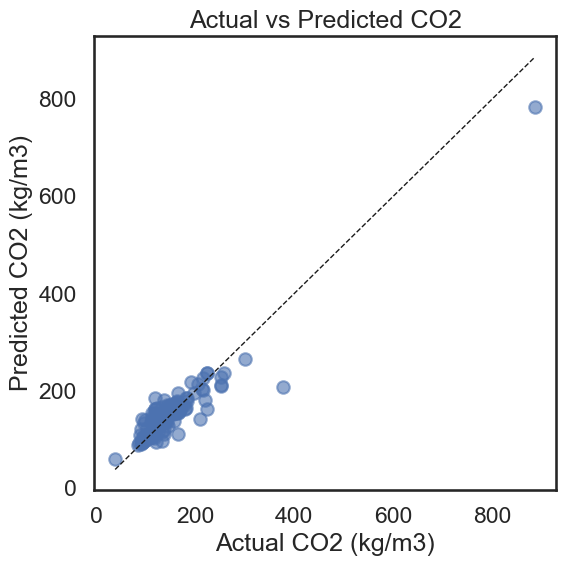

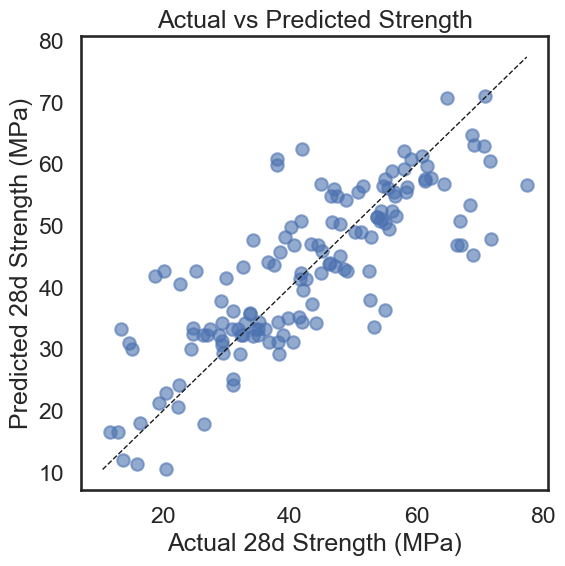

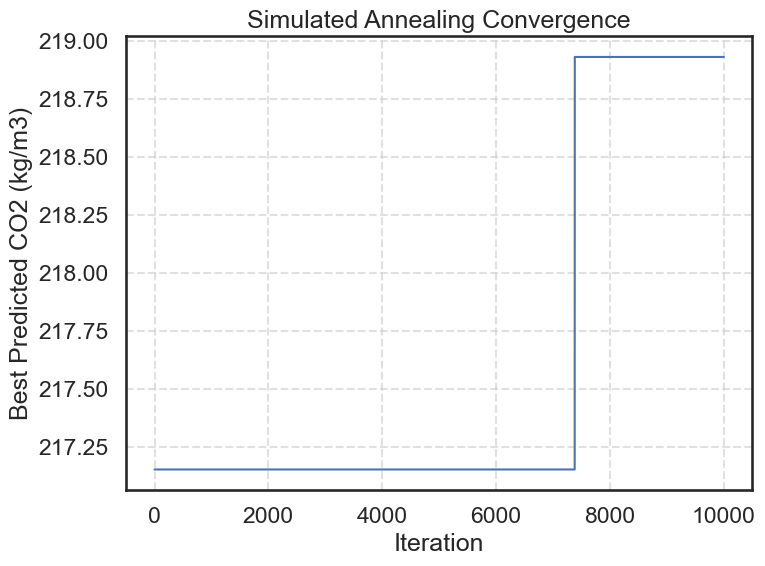

/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


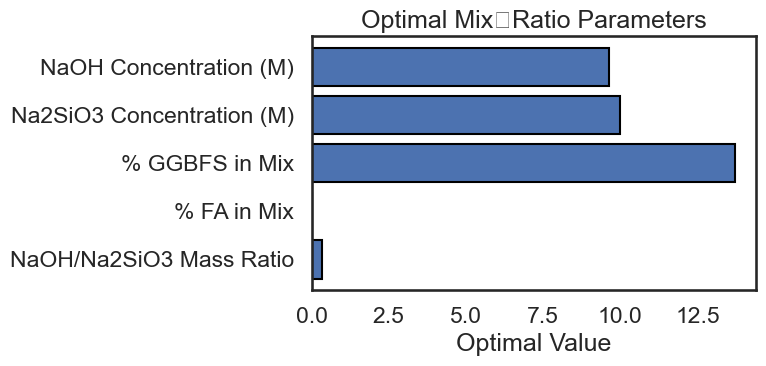

In [37]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

# --- 0) Rename columns to plain ASCII ---
df = df.rename(columns={
    "CO2 Footprint\n(kg/m³)":             "CO2 Footprint (kg/m3)",
    "28-d Cubic compressive strength (MPa)": "28d Strength (MPa)",
    "NaOH / Na2SiO3\nMass Ratio":         "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix":                        "% FA in Mix",
    "% GGBFS in Mix":                     "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)":         "Na2SiO3 Concentration (M)",
    "NaOH\nConcentration (M)":            "NaOH Concentration (M)"
})

# --- 1) Define features and targets ---
features = [
    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3 Concentration (M)",
    "NaOH Concentration (M)"
]
target_co2 = "CO2 Footprint (kg/m3)"
target_str = "28d Strength (MPa)"

X = df[features].values
y_co2 = df[target_co2].values
y_str = df[target_str].values

# --- 2) Split into training & validation (20%) ---
X_train, X_val, y_co2_train, y_co2_val, y_str_train, y_str_val = train_test_split(
    X, y_co2, y_str, test_size=0.20, random_state=42
)

print("Algorithm: Random Forest Regressor + LGBMRegressor + Simulated Annealing (strength ≥ 60 MPa)\n")

# --- 3) Train best CO2 model ---
print("Training CO2 model (Random Forest)...")
co2_model = RandomForestRegressor(n_estimators=200, random_state=42)
co2_model.fit(X_train, y_co2_train)

# --- 4) Train best Strength model ---
print("Training Strength model (LGBM)...")
str_model = LGBMRegressor(random_state=42)
str_model.fit(X_train, y_str_train)
print("Models trained.\n")

# --- 5) Validation metrics ---
def print_metrics(name, y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{name} validation:")
    print(f" • R²   = {r2:.4f}")
    print(f" • MSE  = {mse:.4f}")
    print(f" • RMSE = {rmse:.4f}")
    print(f" • MAE  = {mae:.4f}\n")

y_co2_val_pred = co2_model.predict(X_val)
y_str_val_pred = str_model.predict(X_val)

print_metrics("CO2 Footprint", y_co2_val, y_co2_val_pred)
print_metrics("28d Strength",  y_str_val,  y_str_val_pred)

# --- 6) Simulated Annealing to maximize CO2 under strength ≥ 60 MPa ---
# Prepare training DataFrame for initialization
train_df = pd.DataFrame(X_train, columns=features)
train_df["CO2"] = y_co2_train
train_df["Strength"] = y_str_train

# start from best feasible training row
feasible = train_df[train_df["Strength"] >= 60]
if not feasible.empty:
    init_idx = feasible["CO2"].idxmax()
else:
    init_idx = train_df["Strength"].idxmax()

current      = train_df.loc[init_idx, features].values.copy()
current_co2  = co2_model.predict(current.reshape(1, -1))[0]
current_str  = str_model.predict(current.reshape(1, -1))[0]
best         = current.copy()
best_co2     = current_co2
best_co2_list = [best_co2]

# bounds and perturbation scale
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)
sigma = (maxs - mins) * 0.1  # 10% of range

T = 10.0
alpha = 0.99
max_iter = 10000

print("Running Simulated Annealing optimization...")
for i in range(max_iter):
    # propose a candidate
    cand = current + np.random.normal(0, sigma)
    cand = np.minimum(np.maximum(cand, mins), maxs)

    pred_str = str_model.predict(cand.reshape(1, -1))[0]
    if pred_str >= 60:
        pred_co2 = co2_model.predict(cand.reshape(1, -1))[0]
        # Metropolis criterion
        if (pred_co2 > current_co2 or
            np.random.rand() < np.exp((pred_co2 - current_co2) / T)):
            current, current_co2, current_str = cand, pred_co2, pred_str
            if pred_co2 > best_co2:
                best, best_co2 = cand.copy(), pred_co2

    best_co2_list.append(best_co2)
    T *= alpha
print("Optimization complete.\n")

# --- 7) Report optimal mix & predictions ---
best_str = str_model.predict(best.reshape(1, -1))[0]

print("Optimal mix ratios found:")
for feat, val in zip(features, best):
    print(f" • {feat:<30} = {val:.4f}")
print(f"\nPredicted CO2 Footprint: {best_co2:.4f} kg/m3")
print(f"Predicted 28d Strength:  {best_str:.4f} MPa\n")

# --- 8) Plots (500 dpi) ---

# 8a) Actual vs Predicted CO2
plt.figure(figsize=(6,6))
plt.scatter(y_co2_val, y_co2_val_pred, alpha=0.6)
lims = [min(y_co2_val.min(), y_co2_val_pred.min()),
        max(y_co2_val.max(), y_co2_val_pred.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("Actual CO2 (kg/m3)")
plt.ylabel("Predicted CO2 (kg/m3)")
plt.title("Actual vs Predicted CO2")
plt.tight_layout()
plt.savefig("actual_vs_predicted_CO2.png", dpi=500, bbox_inches="tight")

# 8b) Actual vs Predicted Strength
plt.figure(figsize=(6,6))
plt.scatter(y_str_val, y_str_val_pred, alpha=0.6)
lims = [min(y_str_val.min(), y_str_val_pred.min()),
        max(y_str_val.max(), y_str_val_pred.max())]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel("Actual 28d Strength (MPa)")
plt.ylabel("Predicted 28d Strength (MPa)")
plt.title("Actual vs Predicted Strength")
plt.tight_layout()
plt.savefig("actual_vs_predicted_strength.png", dpi=500, bbox_inches="tight")

# 8c) Convergence of CO2 during SA
plt.figure(figsize=(8,6))
plt.plot(best_co2_list, linewidth=1.5)
plt.xlabel("Iteration")
plt.ylabel("Best Predicted CO2 (kg/m3)")
plt.title("Simulated Annealing Convergence")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("sa_convergence_CO2.png", dpi=500, bbox_inches="tight")

# 8d) Optimal mix‐ratio bar chart
plt.figure(figsize=(8,4))
plt.barh(features, best, edgecolor='black')
plt.xlabel("Optimal Value")
plt.title("Optimal Mix‐Ratio Parameters")
plt.tight_layout()
plt.savefig("optimal_mix_parameters_sa.png", dpi=500, bbox_inches="tight")

plt.show()


Initializing NUTS using jitter+adapt_diag...


Algorithm: Bayesian linear regression via MCMC + posterior‐mean search (strength ≥ 60 MPa)



Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_co2, beta_co2, sigma_co2]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_str, beta_str, sigma_str]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.


CO2 Footprint validation:
 • R²   = -0.0306
 • MSE  = 6252.9712
 • RMSE = 79.0757
 • MAE  = 39.4083

28d Strength validation:
 • R²   = 0.0817
 • MSE  = 211.9256
 • RMSE = 14.5577
 • MAE  = 11.8620

Optimal mix ratios found:
 • NaOH/Na2SiO3 Mass Ratio        = 1.4055
 • % FA in Mix                    = 24.1733
 • % GGBFS in Mix                 = 23.6769
 • Na2SiO3 Concentration (M)      = 7.2554
 • NaOH Concentration (M)         = 22.8041

Predicted CO2 Footprint: 270.7576 kg/m3
Predicted 28d Strength:  63.9354 MPa



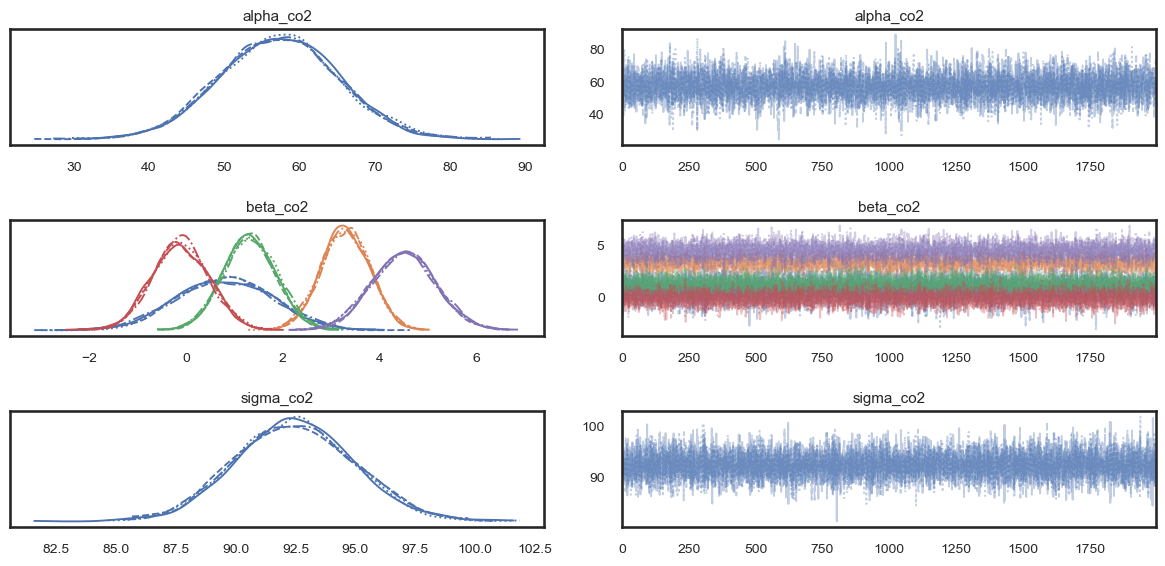

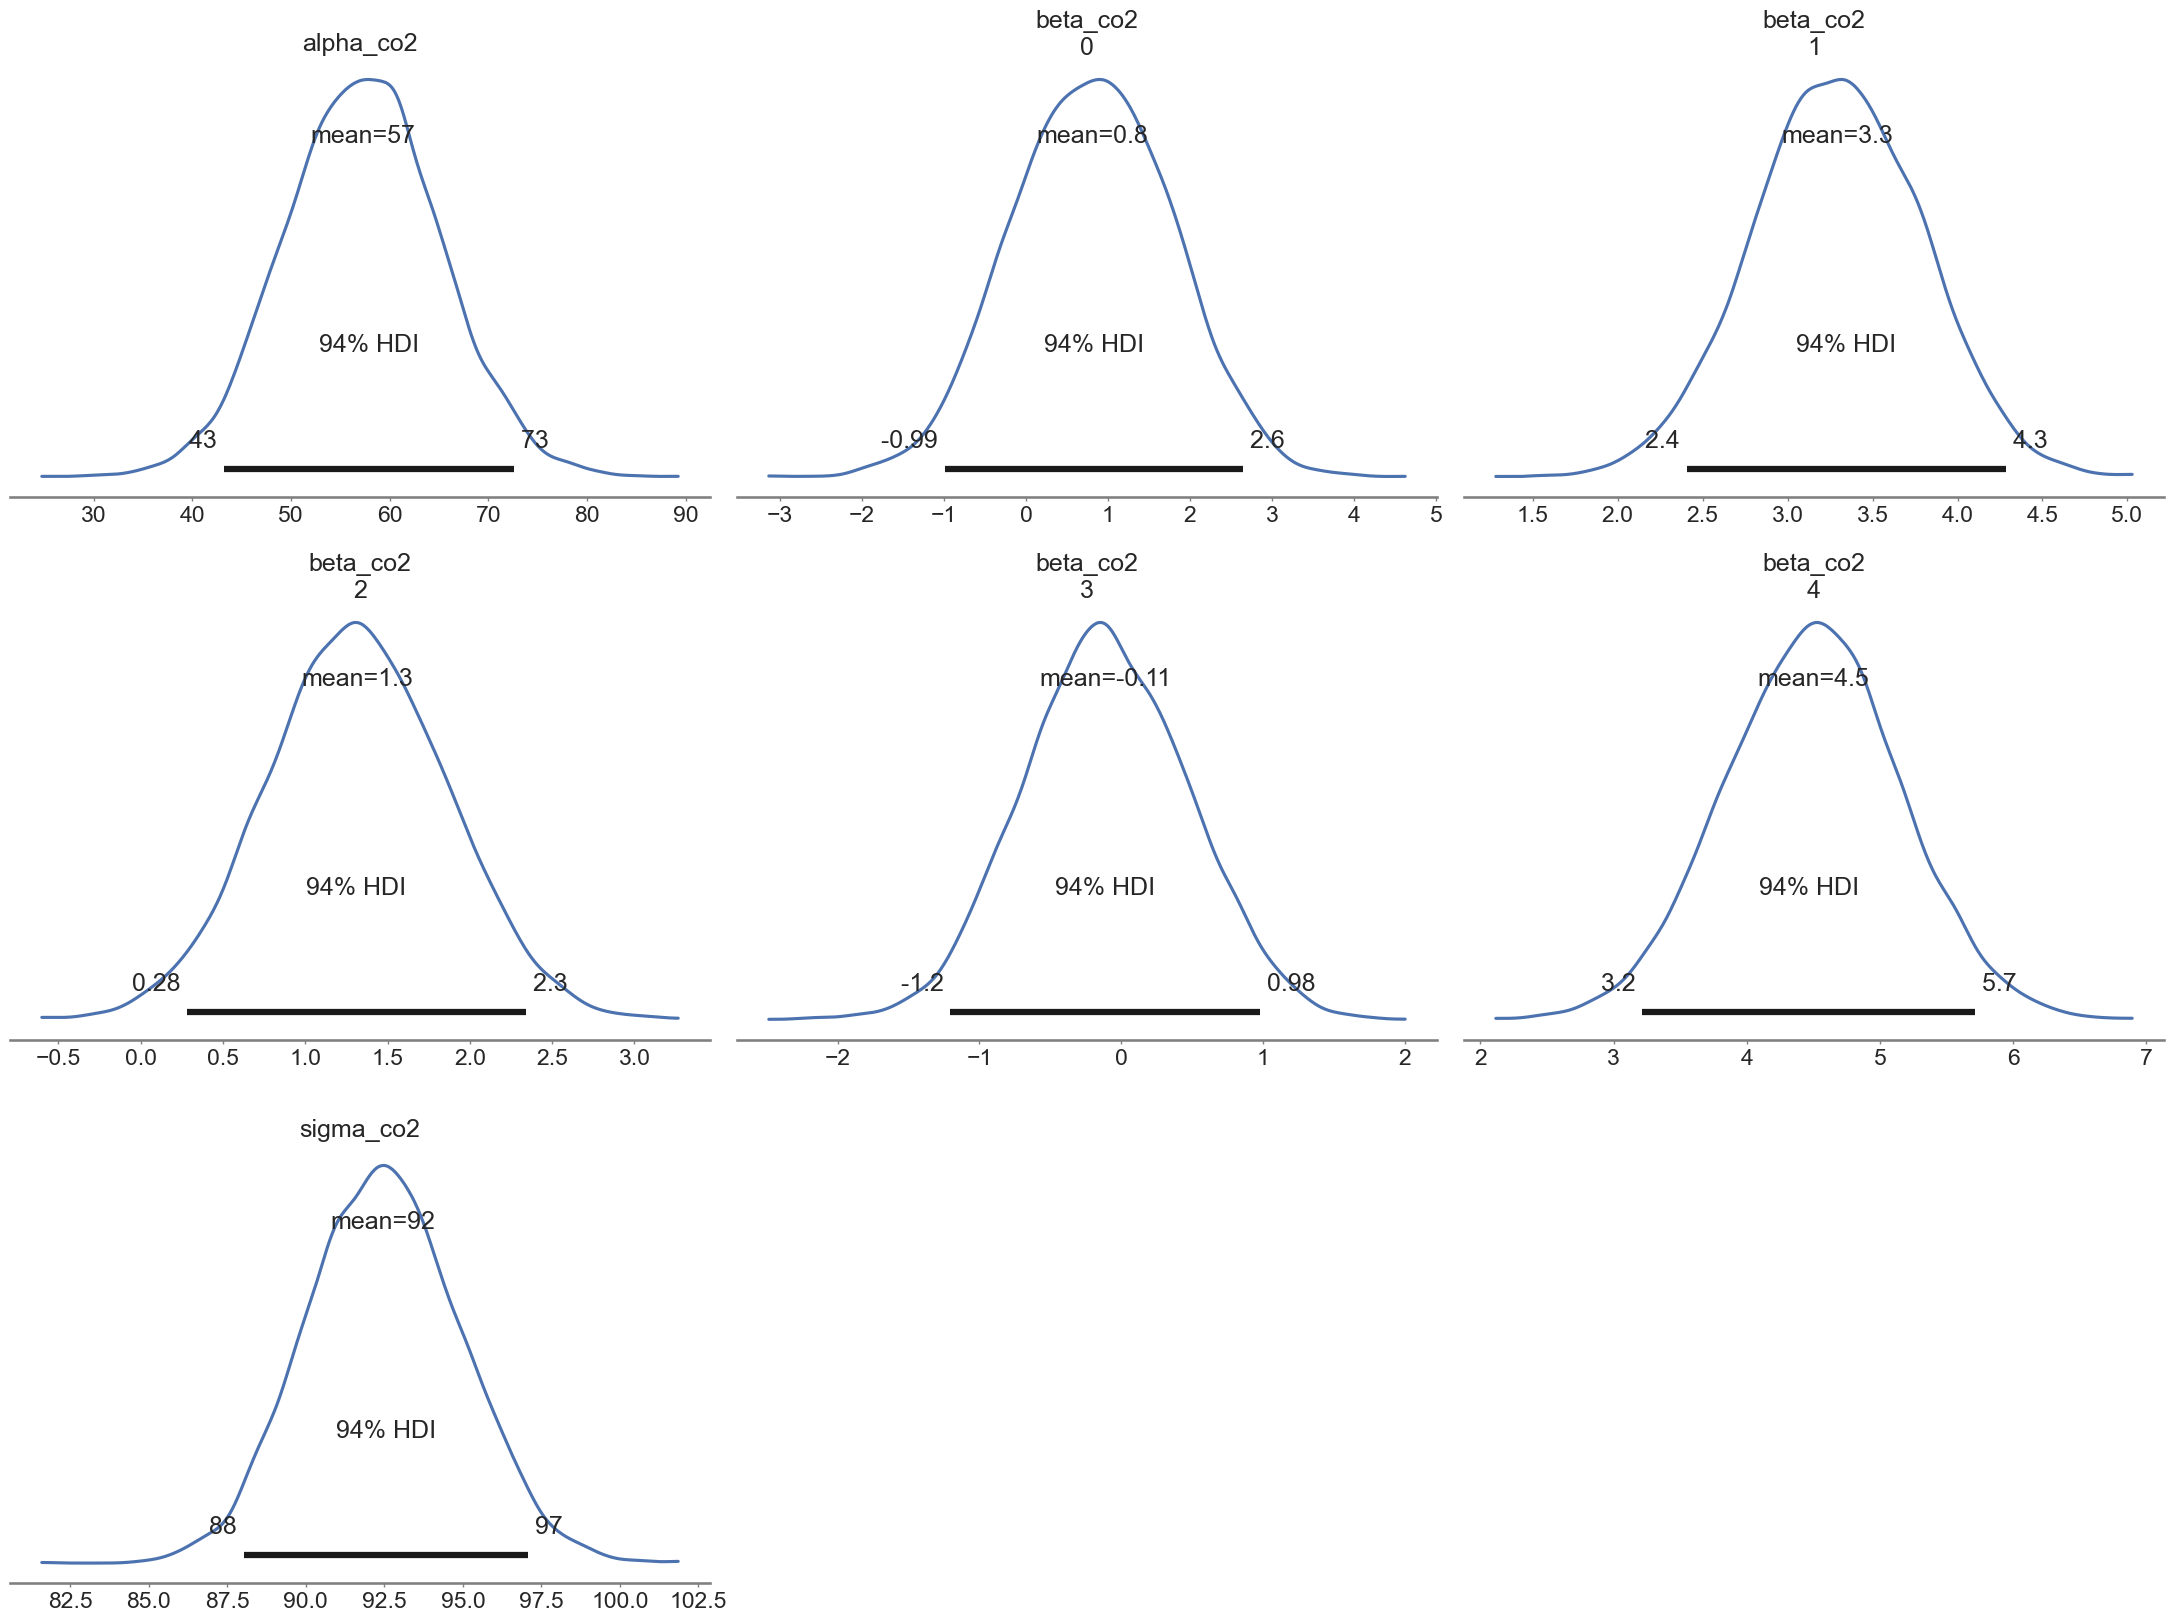

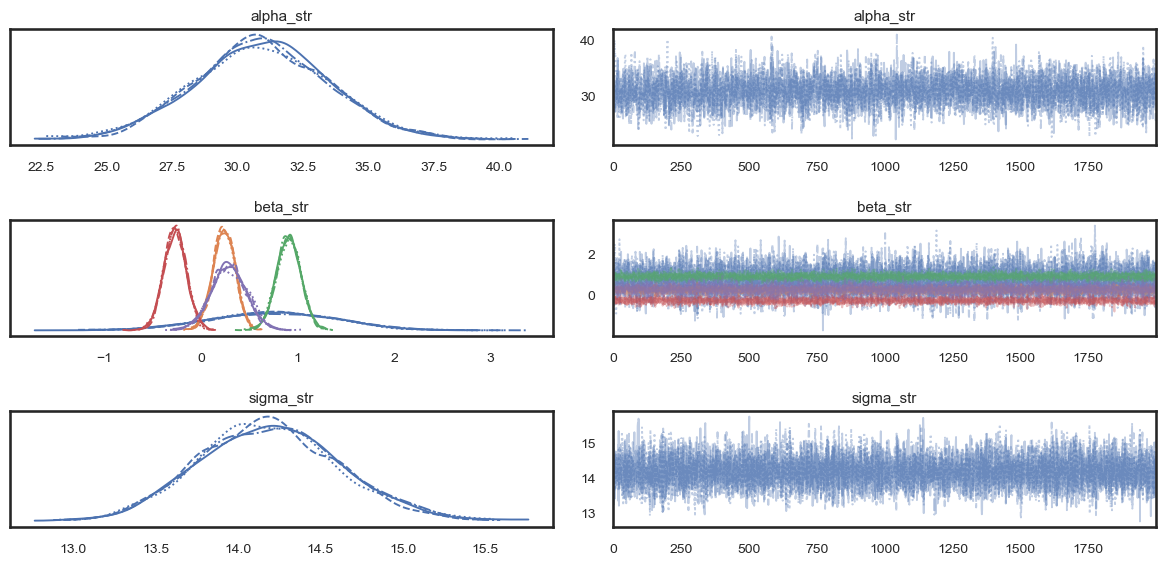

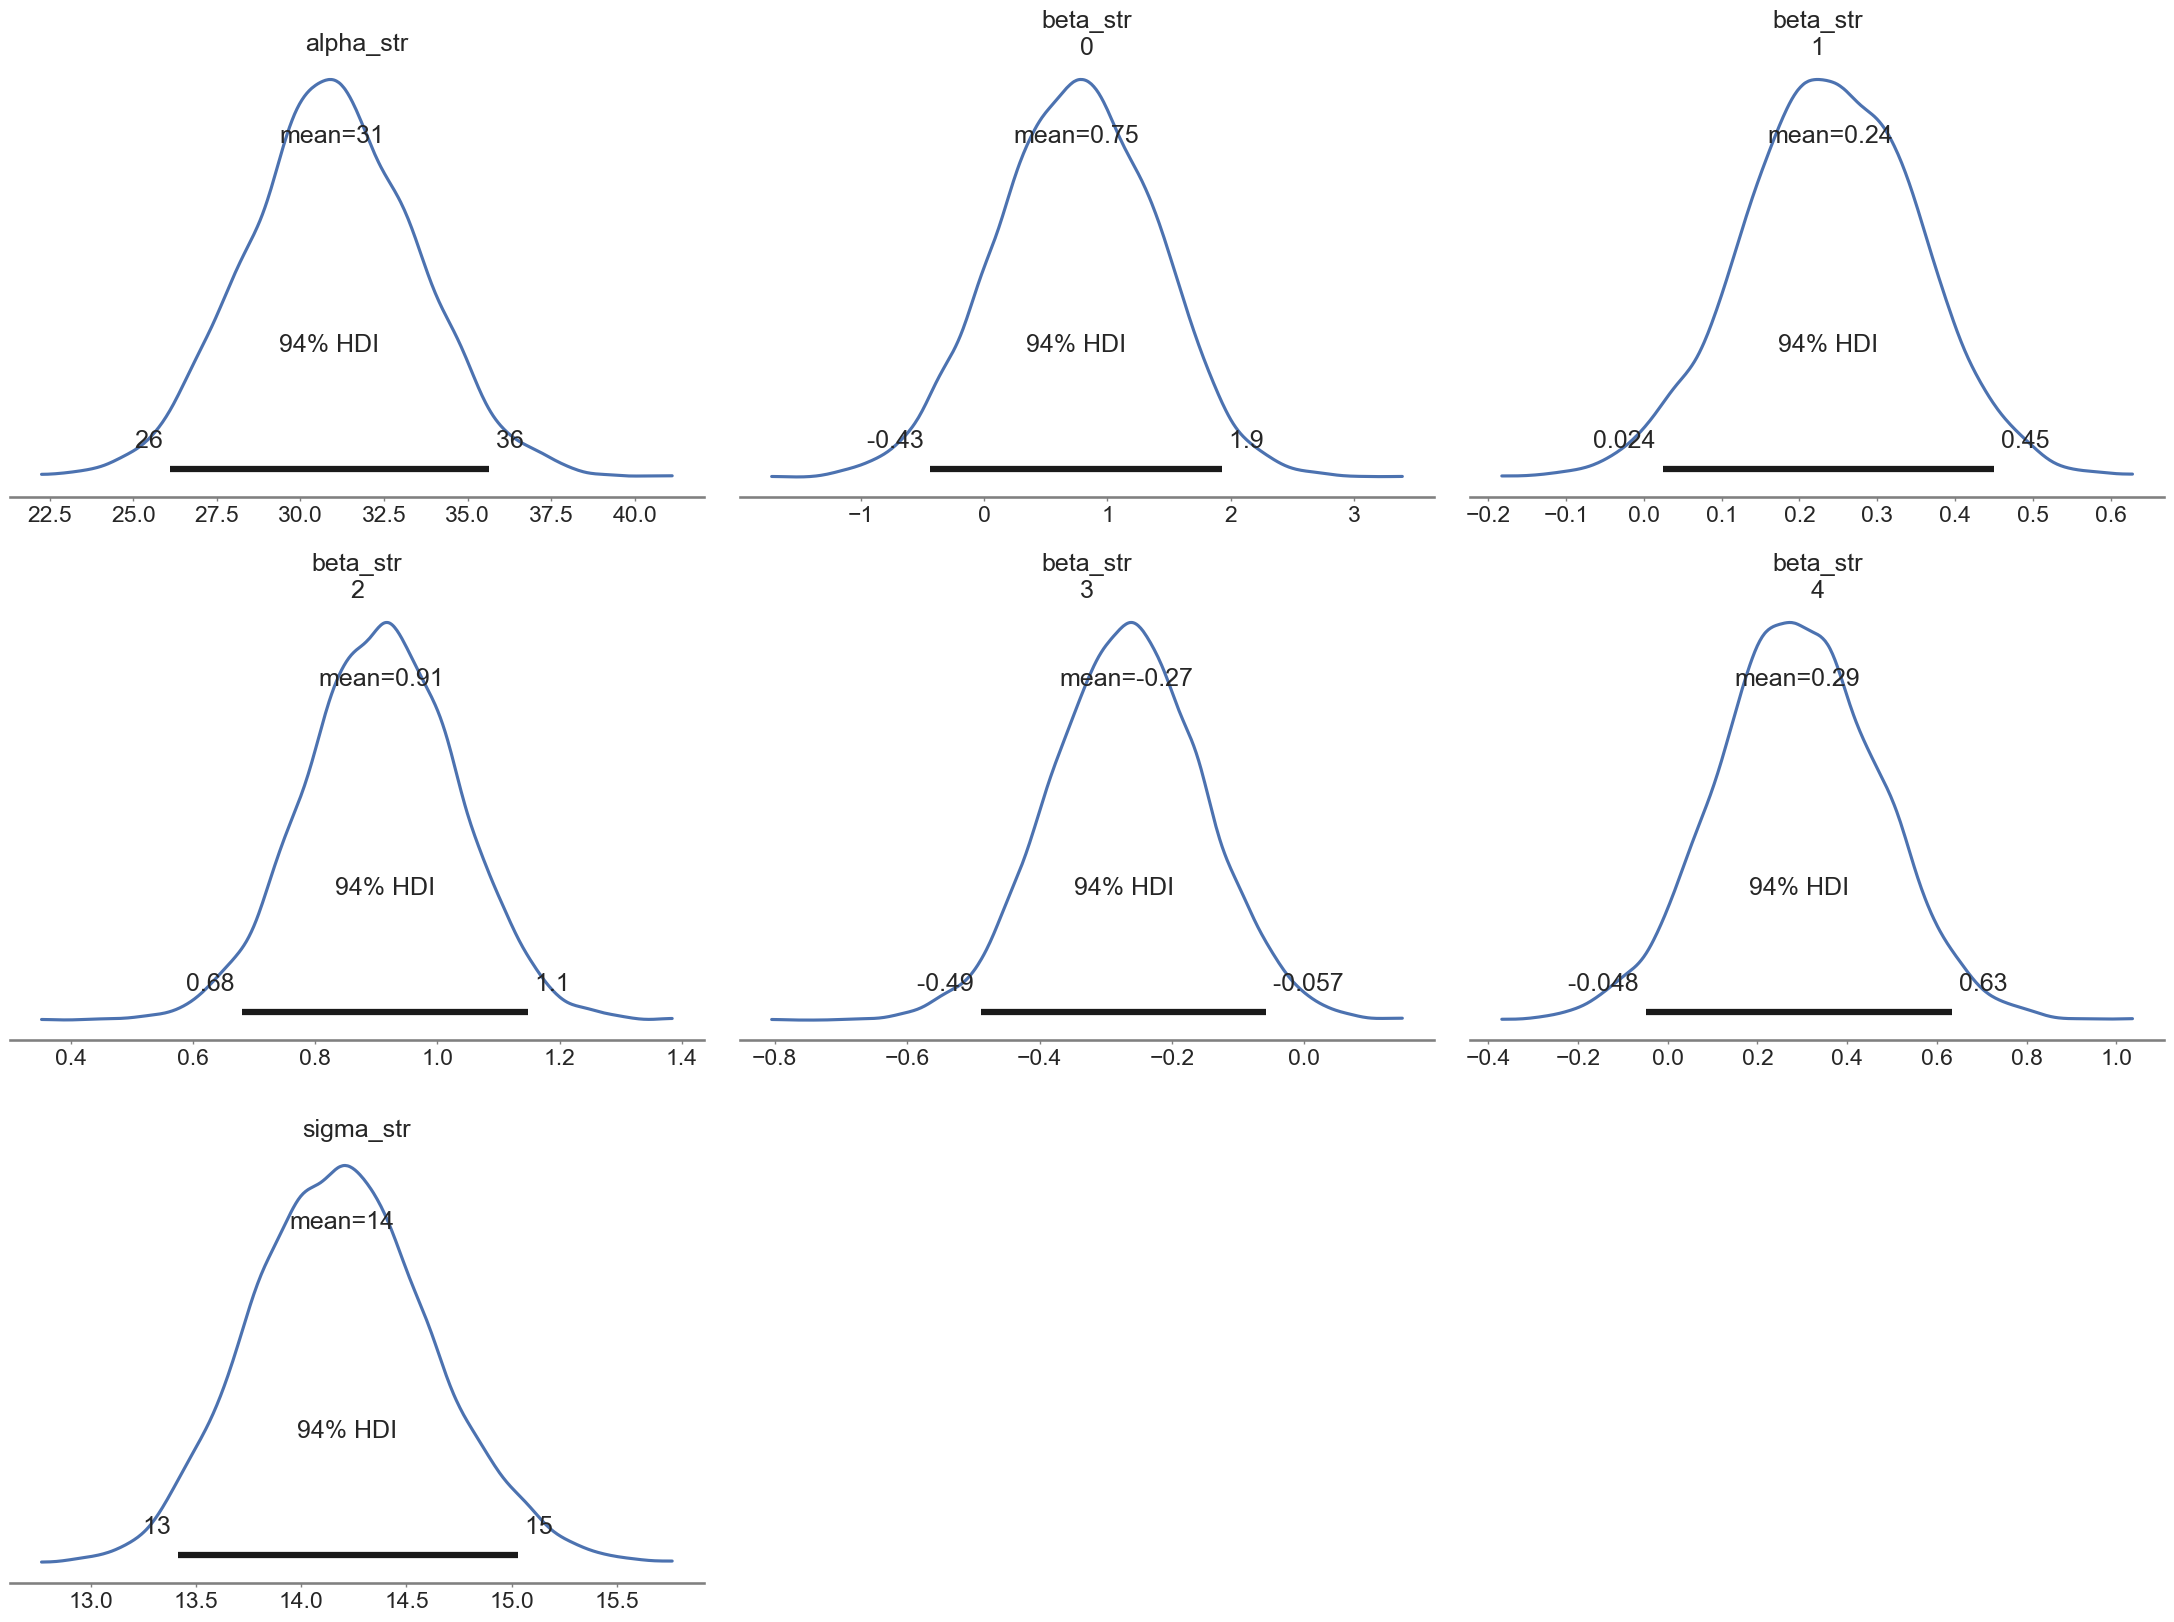

/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_64889/1275081174.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  plt.tight_layout()
/var/folders/7n/jnsm4rc54z7076rb3t0l20780000gn/T/ipykernel_64889/1275081174.py:171: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  plt.savefig("optimal_mix_params.png", dpi=500, bbox_inches="tight")


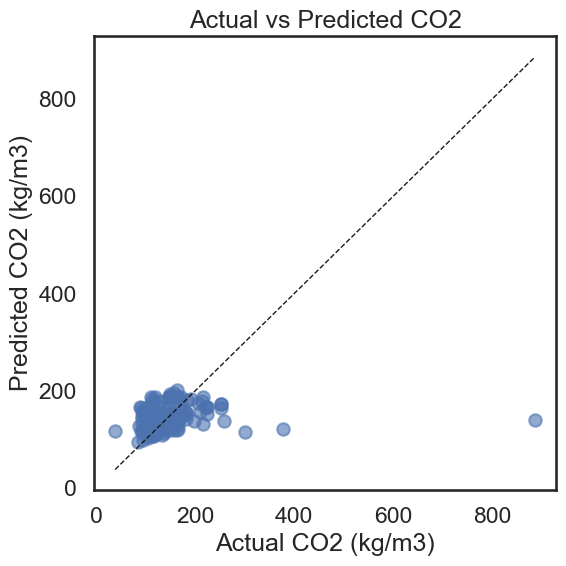

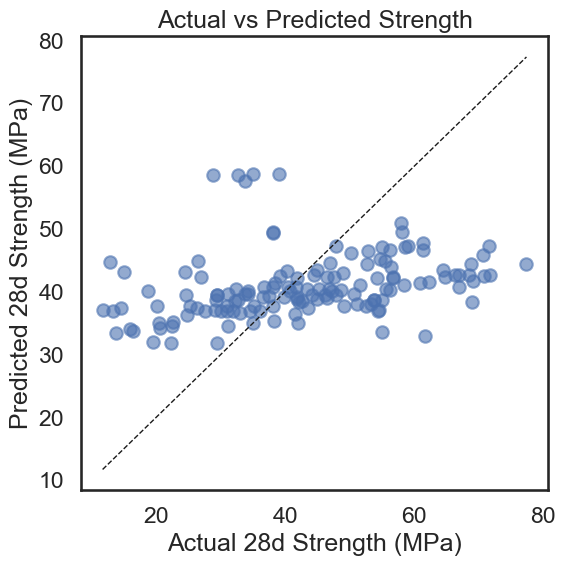

/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


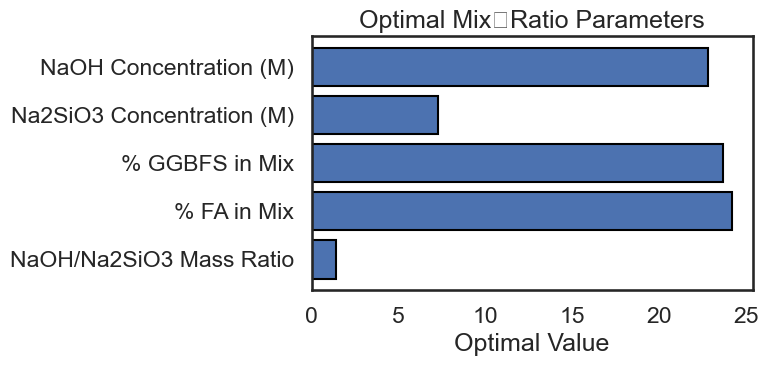

In [41]:
import numpy as np
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- 0) Rename columns to plain ASCII ---
df = df.rename(columns={
    "CO2 Footprint\n(kg/m³)":              "CO2 Footprint (kg/m3)",
    "28-d Cubic compressive strength (MPa)": "28d Strength (MPa)",
    "NaOH / Na2SiO3\nMass Ratio":          "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix":                         "% FA in Mix",
    "% GGBFS in Mix":                      "% GGBFS in Mix",
    "Na2SiO3\nConcentration (M)":          "Na2SiO3 Concentration (M)",
    "NaOH\nConcentration (M)":             "NaOH Concentration (M)"
})

# --- 1) Define features and targets ---
features = [
    "NaOH/Na2SiO3 Mass Ratio",
    "% FA in Mix",
    "% GGBFS in Mix",
    "Na2SiO3 Concentration (M)",
    "NaOH Concentration (M)"
]
target_co2 = "CO2 Footprint (kg/m3)"
target_str = "28d Strength (MPa)"

X = df[features].values
y_co2 = df[target_co2].values
y_str = df[target_str].values

# --- 2) Split into train/validation (20%) ---
X_train, X_val, y_co2_train, y_co2_val, y_str_train, y_str_val = train_test_split(
    X, y_co2, y_str, test_size=0.20, random_state=42
)

print("Algorithm: Bayesian linear regression via MCMC + posterior‐mean search (strength ≥ 60 MPa)\n")

# --- 3) Build and sample Bayesian model for CO2 ---
with pm.Model() as co2_model:
    alpha_co2 = pm.Normal("alpha_co2", mu=0, sigma=10)
    beta_co2  = pm.Normal("beta_co2",  mu=0, sigma=1, shape=len(features))
    sigma_co2 = pm.HalfNormal("sigma_co2", sigma=10)
    mu_co2    = alpha_co2 + pm.math.dot(X_train, beta_co2)
    y_obs_co2 = pm.Normal("y_obs_co2", mu=mu_co2, sigma=sigma_co2, observed=y_co2_train)
    co2_idata = pm.sample(
        draws=2000, tune=1000, chains=4,
        target_accept=0.95, random_seed=42,
        return_inferencedata=True
    )

# --- 4) Build and sample Bayesian model for Strength ---
with pm.Model() as str_model:
    alpha_str = pm.Normal("alpha_str", mu=0, sigma=10)
    beta_str  = pm.Normal("beta_str",  mu=0, sigma=1, shape=len(features))
    sigma_str = pm.HalfNormal("sigma_str", sigma=10)
    mu_str    = alpha_str + pm.math.dot(X_train, beta_str)
    y_obs_str = pm.Normal("y_obs_str", mu=mu_str, sigma=sigma_str, observed=y_str_train)
    str_idata = pm.sample(
        draws=2000, tune=1000, chains=4,
        target_accept=0.95, random_seed=42,
        return_inferencedata=True
    )

# --- 5) Helper to compute posterior‐mean predictions ---
def posterior_mean_prediction(idata, alpha_name, beta_name, X_new):
    alpha_samps = idata.posterior[alpha_name].values.flatten()        # (chains*draws,)
    beta_samps  = idata.posterior[beta_name].values                  # (chains, draws, n_features)
    beta_samps  = beta_samps.reshape(-1, beta_samps.shape[-1])       # (n_samples, n_features)
    preds       = beta_samps.dot(X_new.T) + alpha_samps[:, None]     # (n_samples, n_candidates)
    return preds.mean(axis=0)                                        # (n_candidates,)

# --- 6) Validation predictions & metrics ---
co2_val_pred = posterior_mean_prediction(co2_idata, "alpha_co2", "beta_co2", X_val)
str_val_pred = posterior_mean_prediction(str_idata, "alpha_str", "beta_str", X_val)

def print_metrics(name, y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{name} validation:")
    print(f" • R²   = {r2:.4f}")
    print(f" • MSE  = {mse:.4f}")
    print(f" • RMSE = {rmse:.4f}")
    print(f" • MAE  = {mae:.4f}\n")

print_metrics("CO2 Footprint", y_co2_val, co2_val_pred)
print_metrics("28d Strength",  y_str_val,  str_val_pred)

# --- 7) Posterior‐mean search for optimal mix ---
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)
N_can = 10_000
candidates = np.random.uniform(mins, maxs, size=(N_can, len(features)))

co2_preds = posterior_mean_prediction(co2_idata, "alpha_co2", "beta_co2", candidates)
str_preds = posterior_mean_prediction(str_idata, "alpha_str", "beta_str", candidates)

mask = str_preds >= 60
if not mask.any():
    print("No candidate mix achieves at least 60 MPa strength.")
else:
    valid_cand = candidates[mask]
    valid_co2  = co2_preds[mask]
    valid_str  = str_preds[mask]
    idx_best   = np.argmax(valid_co2)
    best_mix   = valid_cand[idx_best]
    best_co2   = valid_co2[idx_best]
    best_str   = valid_str[idx_best]

    # --- 8) Output optimal mix & predictions ---
    print("Optimal mix ratios found:")
    for feat, val in zip(features, best_mix):
        print(f" • {feat:<30} = {val:.4f}")
    print(f"\nPredicted CO2 Footprint: {best_co2:.4f} kg/m3")
    print(f"Predicted 28d Strength:  {best_str:.4f} MPa\n")

    # --- 9) Plots (500 dpi) ---

    # 9a) Trace & posterior for CO2
    pm.plot_trace(co2_idata)
    plt.tight_layout()
    plt.savefig("co2_trace.png", dpi=500, bbox_inches="tight")
    plt.show()
    pm.plot_posterior(co2_idata)
    plt.tight_layout()
    plt.savefig("co2_posterior.png", dpi=500, bbox_inches="tight")
    plt.show()

    # 9b) Trace & posterior for Strength
    pm.plot_trace(str_idata)
    plt.tight_layout()
    plt.savefig("str_trace.png", dpi=500, bbox_inches="tight")
    plt.show()
    pm.plot_posterior(str_idata)
    plt.tight_layout()
    plt.savefig("str_posterior.png", dpi=500, bbox_inches="tight")
    plt.show()

    # 9c) Actual vs Predicted CO2
    plt.figure(figsize=(6,6))
    plt.scatter(y_co2_val, co2_val_pred, alpha=0.6)
    lims = [min(y_co2_val.min(), co2_val_pred.min()), max(y_co2_val.max(), co2_val_pred.max())]
    plt.plot(lims, lims, 'k--', lw=1)
    plt.xlabel("Actual CO2 (kg/m3)")
    plt.ylabel("Predicted CO2 (kg/m3)")
    plt.title("Actual vs Predicted CO2")
    plt.tight_layout()
    plt.savefig("val_actual_vs_pred_co2.png", dpi=500, bbox_inches="tight")

    # 9d) Actual vs Predicted Strength
    plt.figure(figsize=(6,6))
    plt.scatter(y_str_val, str_val_pred, alpha=0.6)
    lims = [min(y_str_val.min(), str_val_pred.min()), max(y_str_val.max(), str_val_pred.max())]
    plt.plot(lims, lims, 'k--', lw=1)
    plt.xlabel("Actual 28d Strength (MPa)")
    plt.ylabel("Predicted 28d Strength (MPa)")
    plt.title("Actual vs Predicted Strength")
    plt.tight_layout()
    plt.savefig("val_actual_vs_pred_str.png", dpi=500, bbox_inches="tight")

    # 9e) Bar chart of optimal mix
    plt.figure(figsize=(8,4))
    plt.barh(features, best_mix, edgecolor='black')
    plt.xlabel("Optimal Value")
    plt.title("Optimal Mix‐Ratio Parameters")
    plt.tight_layout()
    plt.savefig("optimal_mix_params.png", dpi=500, bbox_inches="tight")
    plt.show()


In [14]:
# 1) Compute the range (min and max) of the CO2 Footprint column
col_co2 = "CO2 Footprint (kg/m3)"
min_val = df[col_co2].min()
max_val = df[col_co2].max()

# 2) Find the corresponding 28-day strength at those CO2 extremes
col_str = "28d Strength (MPa)"
min_idx = df[col_co2].idxmin()
max_idx = df[col_co2].idxmax()
strength_at_min_co2 = df.loc[min_idx, col_str]
strength_at_max_co2 = df.loc[max_idx, col_str]

# 3) Print results
print("CO2 Footprint range:")
print(f" • Minimum CO2 = {min_val:.4f} kg/m³   → 28d Strength = {strength_at_min_co2:.2f} MPa")
print(f" • Maximum CO2 = {max_val:.4f} kg/m³   → 28d Strength = {strength_at_max_co2:.2f} MPa")
print(f" • Range       = {max_val - min_val:.4f} kg/m³")


CO2 Footprint range:
 • Minimum CO2 = 38.2302 kg/m³   → 28d Strength = 42.00 MPa
 • Maximum CO2 = 895.0651 kg/m³   → 28d Strength = 21.83 MPa
 • Range       = 856.8349 kg/m³


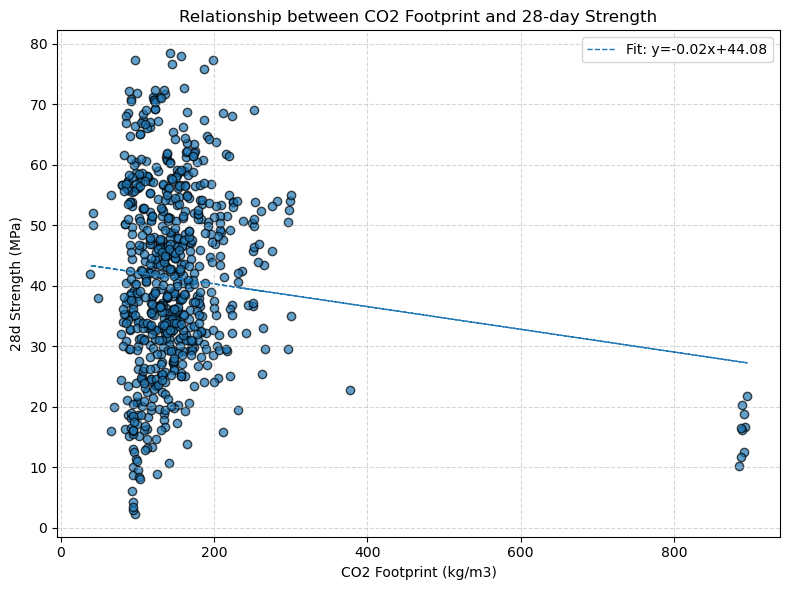

In [16]:
import matplotlib.pyplot as plt

# Columns
col_co2 = "CO2 Footprint (kg/m3)"
col_str = "28d Strength (MPa)"

# Extract data
x = df[col_co2]
y = df[col_str]

# Create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')

# Optional: add a linear fit line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, linestyle='--', linewidth=1, label=f"Fit: y={m:.2f}x+{b:.2f}")

# Labels and title
plt.xlabel("CO2 Footprint (kg/m3)")
plt.ylabel("28d Strength (MPa)")
plt.title("Relationship between CO2 Footprint and 28-day Strength")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save at 500 dpi
plt.savefig("co2_vs_strength_scatter.png", dpi=500, bbox_inches="tight")
plt.show()
